# 0. Install and Import Dependencies

In [ ]:
#!pip install tensorflow==2.4.1 tensorflow-gpu==2.4.1 opencv-python matplotlib

In [ ]:
!pip install tensorflow tensorflow-gpu opencv-python matplotlib
!pip install numpy scipy matplotlib pandas sympy nose Shapely

In [ ]:
import tensorflow as tf
import numpy as np
from matplotlib import pyplot as plt
import cv2

In [ ]:
#Download Model on Lniux
!wget -q -O lite-model_movenet_singlepose_lightning_3.tflite https://tfhub.dev/google/lite-model/movenet/singlepose/lightning/3?lite-format=tflite

In [ ]:
#Download Model on Windows
import requests
url= "https://tfhub.dev/google/lite-model/movenet/singlepose/lightning/3?lite-format=tflite"
r= requests.get(url, allow_redirects=True)
open('lite-model_movenet_singlepose_lightning_3.tflite', 'wb').write(r.content)

# 1. Load Model

In [ ]:
interpreter = tf.lite.Interpreter(model_path='lite-model_movenet_singlepose_lightning_3.tflite')
interpreter.allocate_tensors()

# Orignal Code

# 2. Make Detections

In [ ]:
cap = cv2.VideoCapture(0)
while cap.isOpened():
    ret, frame = cap.read()
    
    # Reshape image
    img = frame.copy()
    img = tf.image.resize_with_pad(np.expand_dims(img, axis=0), 192,192)
    input_image = tf.cast(img, dtype=tf.float32)
    
    # Setup input and output 
    input_details = interpreter.get_input_details()
    output_details = interpreter.get_output_details()
    
    # Make predictions 
    interpreter.set_tensor(input_details[0]['index'], np.array(input_image))
    interpreter.invoke()
    keypoints_with_scores = interpreter.get_tensor(output_details[0]['index'])
    
    # Rendering 
    draw_connections(frame, keypoints_with_scores, EDGES, 0.4)
    draw_keypoints(frame, keypoints_with_scores, 0.4)
    
    cv2.imshow('MoveNet Lightning', frame)
    
    if cv2.waitKey(10) & 0xFF==ord('q'):
        break
        
cap.release()
cv2.destroyAllWindows()

# 3. Draw Keypoints

In [ ]:
def draw_keypoints(frame, keypoints, confidence_threshold):
    y, x, c = frame.shape
    shaped = np.squeeze(np.multiply(keypoints, [y,x,1]))
    
    marker_name= ['nose', 'left eye','right eye', 'left ear', 'right ear', 'left shoulder', 'right shoulder', 'left elbow', 'right elbow', 'left wrist','right wrist', 'left hip', 'right hip', 'left knee', 'right knee', 'left ankle', 'right ankle']
    marker_count=0
    
    for kp in shaped:
        ky, kx, kp_conf = kp
        if kp_conf > confidence_threshold:
            cv2.circle(frame, (int(kx), int(ky)), 4, (0,255,0), -1) 
            cv2.putText(frame, marker_name[marker_count], (int(kx), int(ky)), cv2.FONT_HERSHEY_PLAIN, 2, (255,255,255),2,cv2.LINE_AA)
            marker_count=marker_count+1
            
            #cv2.putText(image, text, org, font, fontScale, color[, thickness[, lineType[, bottomLeftOrigin]]])

# 4. Draw Edges

In [ ]:
EDGES = {
    (0, 1): 'm',
    (0, 2): 'c',
    (1, 3): 'm',
    (2, 4): 'c',
    (0, 5): 'm',
    (0, 6): 'c',
    (5, 7): 'm',
    (7, 9): 'm',
    (6, 8): 'c',
    (8, 10): 'c',
    (5, 6): 'y',
    (5, 11): 'm',
    (6, 12): 'c',
    (11, 12): 'y',
    (11, 13): 'm',
    (13, 15): 'm',
    (12, 14): 'c',
    (14, 16): 'c'
}

In [ ]:
def draw_connections(frame, keypoints, edges, confidence_threshold):
    y, x, c = frame.shape
    shaped = np.squeeze(np.multiply(keypoints, [y,x,1]))
    
    for edge, color in edges.items():
        p1, p2 = edge
        y1, x1, c1 = shaped[p1]
        y2, x2, c2 = shaped[p2]
        
        if (c1 > confidence_threshold) & (c2 > confidence_threshold):      
            cv2.line(frame, (int(x1), int(y1)), (int(x2), int(y2)), (0,0,255), 2)

# Modified Code by Mohit

# 2. Draw Keypoints

In [ ]:
def draw_keypoints(frame, keypoints, confidence_threshold):
    y, x, c = frame.shape
    shaped = np.squeeze(np.multiply(keypoints, [y,x,1]))
    
    marker_name= ['nose', 'left eye','right eye', 'left ear', 'right ear', 'left shoulder', 'right shoulder', 'left elbow', 'right elbow', 'left wrist','right wrist', 'left hip', 'right hip', 'left knee', 'right knee', 'left ankle', 'right ankle']
    marker_count=0
    
    for kp in shaped:
        ky, kx, kp_conf = kp
        if kp_conf > confidence_threshold:
            cv2.circle(frame, (int(kx), int(ky)), 4, (0,255,0), -1) 
            # put text on markers
#             cv2.putText(frame, marker_name[marker_count], (int(kx), int(ky)), cv2.FONT_HERSHEY_PLAIN, 2, (255,255,255),2,cv2.LINE_AA)
            cv2.putText(frame, str(marker_count), (int(kx), int(ky)), cv2.FONT_HERSHEY_PLAIN, 2, (255,255,255),2,cv2.LINE_AA)
            marker_count=marker_count+1
            
            #cv2.putText(image, text, org, font, fontScale, color[, thickness[, lineType[, bottomLeftOrigin]]])

# 3. Draw Edges

In [ ]:
EDGES = {
    (0, 1): 'm',
    (0, 2): 'c',
    (1, 3): 'm',
    (2, 4): 'c',
    (0, 5): 'm',
    (0, 6): 'c',
    (5, 7): 'm',
    (7, 9): 'm',
    (6, 8): 'c',
    (8, 10): 'c',
    (5, 6): 'y',
    (5, 11): 'm',
    (6, 12): 'c',
    (11, 12): 'y',
    (11, 13): 'm',
    (13, 15): 'm',
    (12, 14): 'c',
    (14, 16): 'c'
}

In [ ]:
def draw_connections(frame, keypoints, edges, confidence_threshold):
    y, x, c = frame.shape
    shaped = np.squeeze(np.multiply(keypoints, [y,x,1]))
    
    for edge, color in edges.items():
        p1, p2 = edge
        y1, x1, c1 = shaped[p1]
        y2, x2, c2 = shaped[p2]
        
        if (c1 > confidence_threshold) & (c2 > confidence_threshold):      
            cv2.line(frame, (int(x1), int(y1)), (int(x2), int(y2)), (0,0,255), 2)

In [ ]:
# List camera devices

index = 0
arr = []
while True:
    cap = cv2.VideoCapture(index)
    if not cap.read()[0]:
        break
    else:
        arr.append(index)
    cap.release()
    index += 1
print(arr)

# 4. Make Detections - Mohit Version for black screen

In [ ]:
cap = cv2.VideoCapture(0)
while cap.isOpened():
    ret, frame = cap.read()
    
    # Reshape image
    img = frame.copy()
    
    #width, height = img.size
    #print(width, height)
    
    img = tf.image.resize_with_pad(np.expand_dims(img, axis=0), 192, 192)
    input_image = tf.cast(img, dtype=tf.float32)
    
    # Setup input and output 
    input_details = interpreter.get_input_details()
    output_details = interpreter.get_output_details()
    
    # Make predictions 
    interpreter.set_tensor(input_details[0]['index'], np.array(input_image))
    interpreter.invoke()
    keypoints_with_scores = interpreter.get_tensor(output_details[0]['index'])
    
    #Rendering with background image 
    
    #Reading the background image
    image = cv2.imread(r'C:\Users\devops\PoseEstimationProject\background.jpg')
    width = 800
    height = 1100
    dim = (width, height)
    image = cv2.resize(image, dim, interpolation = cv2.INTER_AREA)
    #Create a black image
    img = np.zeros((512,512,3), np.uint8)
    
    draw_connections(image, keypoints_with_scores, EDGES, 0.4)
    draw_keypoints(image, keypoints_with_scores, 0.4)
        
    cv2.imshow('MoveNet Lightning', image)
    
#     # Rendering 
#     draw_connections(frame, keypoints_with_scores, EDGES, 0.4)
#     draw_keypoints(frame, keypoints_with_scores, 0.4)
    
#     cv2.imshow('MoveNet Lightning', frame)
        
    
    
    if cv2.waitKey(10) & 0xFF==ord('q'):
        break
        
cap.release()
cv2.destroyAllWindows()

# Update image with another sub image

In [4]:
import tensorflow as tf
import numpy as np
from matplotlib import pyplot as plt
from scipy.stats import linregress
import cv2

from numpy import ones,vstack
from numpy.linalg import lstsq
import math

from shapely.geometry import LineString

interpreter = tf.lite.Interpreter(model_path='lite-model_movenet_singlepose_lightning_3.tflite')
interpreter.allocate_tensors()

In [64]:
#function to get corners of a square with only the coordinates of the line in middle
def get_quadCorners(x1, y1, x2, y2, factor):
    
    line_length = math.sqrt((x2 - x1) ** 2 + (y2 - y1) ** 2)
    slope, intercept, r_value, p_value, std_err = linregress([x1,x2],[y1,y2])
    
    a = (x1, y1)
    b = (x2, y2)
    ab = LineString([a, b])
    left = ab.parallel_offset(line_length / int(factor), 'left')
    right = ab.parallel_offset(line_length / int(factor), 'right')
    
    c = left.boundary[1]
    d = right.boundary[0]
    e = left.boundary[0]
    f = right.boundary[1]
    
    points = np.array(
    [
        [c.x, c.y],
        [d.x, d.y],
        [e.x, e.y],
        [f.x, f.y],
    ])
    
#     print(slope,intercept)
    return (points)        

C:\Users\devops\AppData\Local\Temp/ipykernel_3440/2266479941.py:13: ShapelyDeprecationWarning: __getitem__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  c = left.boundary[1]
C:\Users\devops\AppData\Local\Temp/ipykernel_3440/2266479941.py:14: ShapelyDeprecationWarning: __getitem__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  d = right.boundary[0]
C:\Users\devops\AppData\Local\Temp/ipykernel_3440/2266479941.py:15: ShapelyDeprecationWarning: __getitem__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  e = left.boundary[0]
C:\Users\devops\AppData\Local\Temp/ipykernel_3440/2266479941.py:16: ShapelyDeprecationWarning: __getitem__ for multi-part geometries

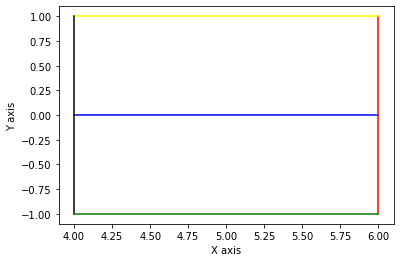

In [65]:
a, b = [[4,0], [6,0]]   # point definition
squareCorners = get_quadCorners(a[0], a[1], b[0], b[1], 2)

plt.plot([a[0],b[0]], [a[1],b[1]], color = 'blue')
plt.plot([squareCorners[0][0], squareCorners[1][0]], [squareCorners[0][1], squareCorners[1][1]], color='red')
plt.plot([squareCorners[0][0], squareCorners[2][0]], [squareCorners[0][1], squareCorners[2][1]], color='yellow')
plt.plot([squareCorners[2][0], squareCorners[3][0]], [squareCorners[2][1], squareCorners[3][1]], color='black')
plt.plot([squareCorners[1][0], squareCorners[3][0]], [squareCorners[1][1], squareCorners[3][1]], color='green')

plt.xlabel('X axis')
plt.ylabel('Y axis')
plt.show()

In [46]:
class all_keypoints_withnames:
  def __init__(self, x, y, confidence, name):
    self.x = x
    self.y = y
    self.confidence = confidence
    self.name = name

In [63]:
marker_name = ['nose', 'left eye','right eye', 'left ear', 'right ear', 'left shoulder', 'right shoulder', 'left elbow', 'right elbow', 'left wrist','right wrist', 'left hip', 'right hip', 'left knee', 'right knee', 'left ankle', 'right ankle']  
count = 0
for m in marker_name:
    print(str(count) + ": " + m)
    count=count+1

0: nose
1: left eye
2: right eye
3: left ear
4: right ear
5: left shoulder
6: right shoulder
7: left elbow
8: right elbow
9: left wrist
10: right wrist
11: left hip
12: right hip
13: left knee
14: right knee
15: left ankle
16: right ankle


In [69]:
def keypoints_modification(frame, keypoints):
    y, x, c = frame.shape
    shaped = np.squeeze(np.multiply(keypoints, [y,x,1]))
    shaped_modified = np.empty(shape=(53, 4), dtype=all_keypoints_withnames)
    
    marker_name = ['nose', 'left eye','right eye', 'left ear', 'right ear', 'left shoulder', 'right shoulder', 'left elbow', 'right elbow', 'left wrist','right wrist', 'left hip', 'right hip', 'left knee', 'right knee', 'left ankle', 'right ankle']  
    marker_count = 0
    
    coordForleftEar = ()
    coordForrightEar = ()
    
    for kp in shaped:
        ky, kx, kp_conf = kp
        
        shaped_modified[marker_count] = [ky, kx, kp_conf, marker_name[marker_count]]  # getting new keypoints array populated with inital points            
        marker_count=marker_count+1

        # Custom points displayed and added in the list for FACE square
        squareCorners = get_quadCorners(shaped_modified[3][1], shaped_modified[3][0], shaped_modified[4][1], shaped_modified[4][0], 2)
        # Adding new keypoints for face square
        shaped_modified[17] = [squareCorners[0][1], squareCorners[0][0], coordForleftEar[2], "face top left"] 
        shaped_modified[18] = [squareCorners[1][1], squareCorners[1][0], coordForleftEar[2], "face bottom right"]
        shaped_modified[19] = [squareCorners[2][1], squareCorners[2][0], coordForleftEar[2], "face top left"]
        shaped_modified[20] = [squareCorners[3][1], squareCorners[3][0], coordForleftEar[2], "face bottom right"]
                
        # Custom points displayed and added in the list for left bicep rectangle
        squareCorners = get_quadCorners(shaped_modified[5][1], shaped_modified[5][0], shaped_modified[7][1], shaped_modified[7][0], 4)
        # Adding new keypoints for face square
        shaped_modified[17] = [squareCorners[0][1], squareCorners[0][0], coordForleftEar[2], "left bicep top left"] 
        shaped_modified[18] = [squareCorners[1][1], squareCorners[1][0], coordForleftEar[2], "left bicep bottom right"]
        shaped_modified[19] = [squareCorners[2][1], squareCorners[2][0], coordForleftEar[2], "left bicep top left"]
        shaped_modified[20] = [squareCorners[3][1], squareCorners[3][0], coordForleftEar[2], "left bicep bottom right"]
    
        # Custom points displayed and added in the list for left forearm rectangle
        squareCorners = get_quadCorners(shaped_modified[7][1], shaped_modified[7][0], shaped_modified[9][1], shaped_modified[9][0], 4)
        # Adding new keypoints for face square
        shaped_modified[17] = [squareCorners[0][1], squareCorners[0][0], coordForleftEar[2], "left forearm top left"] 
        shaped_modified[18] = [squareCorners[1][1], squareCorners[1][0], coordForleftEar[2], "left forearm bottom right"]
        shaped_modified[19] = [squareCorners[2][1], squareCorners[2][0], coordForleftEar[2], "left forearm top left"]
        shaped_modified[20] = [squareCorners[3][1], squareCorners[3][0], coordForleftEar[2], "left forearm bottom right"]
        
        # Custom points displayed and added in the list for right bicep rectangle
        squareCorners = get_quadCorners(shaped_modified[6][1], shaped_modified[6][0], shaped_modified[8][1], shaped_modified[8][0], 4)
        # Adding new keypoints for face square
        shaped_modified[17] = [squareCorners[0][1], squareCorners[0][0], coordForleftEar[2], "right bicep top left"] 
        shaped_modified[18] = [squareCorners[1][1], squareCorners[1][0], coordForleftEar[2], "right bicep bottom right"]
        shaped_modified[19] = [squareCorners[2][1], squareCorners[2][0], coordForleftEar[2], "right bicep top left"]
        shaped_modified[20] = [squareCorners[3][1], squareCorners[3][0], coordForleftEar[2], "right bicep bottom right"]
        
        # Custom points displayed and added in the list for right forearm rectangle
        squareCorners = get_quadCorners(shaped_modified[8][1], shaped_modified[8][0], shaped_modified[10][1], shaped_modified[10][0], 4)
        # Adding new keypoints for face square
        shaped_modified[17] = [squareCorners[0][1], squareCorners[0][0], coordForleftEar[2], "right forearm top left"] 
        shaped_modified[18] = [squareCorners[1][1], squareCorners[1][0], coordForleftEar[2], "right forearm bottom right"]
        shaped_modified[19] = [squareCorners[2][1], squareCorners[2][0], coordForleftEar[2], "right forearm top left"]
        shaped_modified[20] = [squareCorners[3][1], squareCorners[3][0], coordForleftEar[2], "right forearm bottom right"]
    
        # Custom points displayed and added in the list for left thigh rectangle
        squareCorners = get_quadCorners(shaped_modified[11][1], shaped_modified[11][0], shaped_modified[13][1], shaped_modified[13][0], 3)
        # Adding new keypoints for face square
        shaped_modified[17] = [squareCorners[0][1], squareCorners[0][0], coordForleftEar[2], "left thigh top left"] 
        shaped_modified[18] = [squareCorners[1][1], squareCorners[1][0], coordForleftEar[2], "left thigh bottom right"]
        shaped_modified[19] = [squareCorners[2][1], squareCorners[2][0], coordForleftEar[2], "left thigh top left"]
        shaped_modified[20] = [squareCorners[3][1], squareCorners[3][0], coordForleftEar[2], "left thigh bottom right"]
    
        # Custom points displayed and added in the list for left calf rectangle
        squareCorners = getget_quadCorners_rectangleCorners(shaped_modified[13][1], shaped_modified[13][0], shaped_modified[15][1], shaped_modified[15][0], 3)
        # Adding new keypoints for face square
        shaped_modified[17] = [squareCorners[0][1], squareCorners[0][0], coordForleftEar[2], "left forearm top left"] 
        shaped_modified[18] = [squareCorners[1][1], squareCorners[1][0], coordForleftEar[2], "left forearm bottom right"]
        shaped_modified[19] = [squareCorners[2][1], squareCorners[2][0], coordForleftEar[2], "left forearm top left"]
        shaped_modified[20] = [squareCorners[3][1], squareCorners[3][0], coordForleftEar[2], "left forearm bottom right"]
        
        # Custom points displayed and added in the list for right thigh rectangle
        squareCorners = get_quadCorners(shaped_modified[12][1], shaped_modified[12][0], shaped_modified[14][1], shaped_modified[14][0], 3)
        # Adding new keypoints for face square
        shaped_modified[17] = [squareCorners[0][1], squareCorners[0][0], coordForleftEar[2], "right thigh top left"] 
        shaped_modified[18] = [squareCorners[1][1], squareCorners[1][0], coordForleftEar[2], "right thigh bottom right"]
        shaped_modified[19] = [squareCorners[2][1], squareCorners[2][0], coordForleftEar[2], "right thigh top left"]
        shaped_modified[20] = [squareCorners[3][1], squareCorners[3][0], coordForleftEar[2], "right thigh bottom right"]
        
        # Custom points displayed and added in the list for right calf rectangle
        squareCorners = get_quadCorners(shaped_modified[14][1], shaped_modified[14][0], shaped_modified[16][1], shaped_modified[16][0], 3)
        # Adding new keypoints for face square
        shaped_modified[17] = [squareCorners[0][1], squareCorners[0][0], coordForleftEar[2], "right calf top left"] 
        shaped_modified[18] = [squareCorners[1][1], squareCorners[1][0], coordForleftEar[2], "right calf bottom right"]
        shaped_modified[19] = [squareCorners[2][1], squareCorners[2][0], coordForleftEar[2], "right calf top left"]
        shaped_modified[20] = [squareCorners[3][1], squareCorners[3][0], coordForleftEar[2], "right calf bottom right"]

    print(shaped_modified)
    return shaped_modified

In [43]:
def draw_keypoints(frame, keypoints, confidence_threshold):
    y, x, c = frame.shape
    shaped = np.squeeze(np.multiply(keypoints, [y,x,1]))
    shaped_modified = np.empty(shape=(21, 3), dtype=float)
    
    marker_name = ['nose', 'left eye','right eye', 'left ear', 'right ear', 'left shoulder', 'right shoulder', 'left elbow', 'right elbow', 'left wrist','right wrist', 'left hip', 'right hip', 'left knee', 'right knee', 'left ankle', 'right ankle']  
    marker_name_modified = marker_name
    marker_count = 0
    
    coordForleftEar = ()
    coordForrightEar = ()
    
    for kp in shaped:
        ky, kx, kp_conf = kp
        
        shaped_modified[marker_count] = [ky, kx, kp_conf]  # getting new keypoints array populated with inital points
        
        if kp_conf > confidence_threshold:
#             print(str(marker_name[marker_count]) + " is for marker_count: " + str(marker_count) + " at: " + str(str(int(kx)) + ',' + str(int(kx))))
            if ((marker_count !=0) and (marker_count !=1) and (marker_count !=2) and (marker_count !=3) and (marker_count !=4)):
                cv2.circle(frame, (int(kx), int(ky)), 4, (0,255,0), -1) 
            # put text on markers
#             cv2.putText(frame, str(str(int(kx)) + ',' + str(int(kx))), (int(kx), int(ky)), cv2.FONT_HERSHEY_PLAIN, 2, (255,255,255),2,cv2.LINE_AA)
#             cv2.putText(frame, marker_name[marker_count], (int(kx), int(ky)), cv2.FONT_HERSHEY_PLAIN, 2, (255,255,255),2,cv2.LINE_AA)

                    
        marker_count=marker_count+1


        
        
EDGES = {
    (0, 1): 'm',
    (0, 2): 'c',
    (1, 3): 'm',
    (2, 4): 'c',
    (0, 5): 'm',
    (0, 6): 'c',
    (5, 7): 'm',
    (7, 9): 'm',
    (6, 8): 'c',
    (8, 10): 'c',
    (5, 6): 'y',
    (5, 11): 'm',
    (6, 12): 'c',
    (11, 12): 'y',
    (11, 13): 'm',
    (13, 15): 'm',
    (12, 14): 'c',
    (14, 16): 'c'
}

def draw_connections(frame, keypoints, edges, confidence_threshold):
    y, x, c = frame.shape
    shaped = np.squeeze(np.multiply(keypoints, [y,x,1]))
    
#=========================================================================
#     marker_name= ['nose', 'left eye','right eye', 'left ear', 'right ear', 'left shoulder', 'right shoulder', 'left elbow', 'right elbow', 'left wrist','right wrist', 'left hip', 'right hip', 'left knee', 'right knee', 'left ankle', 'right ankle']
#     marker_count=0
    
#     coordForleftEar =()
#     coordForrightEar =()
    
#     for kp in shaped:
#         ky, kx, kp_conf = kp
#         if kp_conf > confidence_threshold:
#             if(marker_count == 3):
#                 coordForleftEar = [kx, ky]
#             if(marker_count == 4):
#                 coordForrightEar = [kx, ky]
                
#             marker_count=marker_count+1
            
            

#     if ((len(coordForleftEar) > 0) and (len(coordForrightEar) > 0)):
#         squareCorners = get_squareCorners(coordForleftEar[0], coordForleftEar[1], coordForrightEar[0], coordForrightEar[1])
#         cv2.circle(frame, (int(squareCorners[0][0]), int(squareCorners[0][1])), 4, (0,0,255), -1) 
#         cv2.circle(frame, (int(squareCorners[1][0]), int(squareCorners[1][1])), 4, (0,0,255), -1) 
#         cv2.circle(frame, (int(squareCorners[2][0]), int(squareCorners[2][1])), 4, (0,0,255), -1) 
#         cv2.circle(frame, (int(squareCorners[3][0]), int(squareCorners[3][1])), 4, (0,0,255), -1) 
    
#=========================================================================

    for edge, color in edges.items():
        p1, p2 = edge
        y1, x1, c1 = shaped[p1]
        y2, x2, c2 = shaped[p2]
        
        if (c1 > confidence_threshold) & (c2 > confidence_threshold):      
            cv2.line(frame, (int(x1), int(y1)), (int(x2), int(y2)), (0,0,255), 2)
            
            
            


In [ ]:
headimg = cv2.imread(r'C:\Users\devops\PoseEstimationProject\head.jpg', cv2.IMREAD_COLOR)
headimg= cv2.cvtColor(headimg, cv2.COLOR_BGR2RGB)
print(headimg.shape)
plt.imshow(headimg)

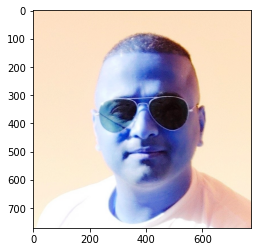

In [10]:
myframe = cv2.imread(r'C:\Users\devops\PoseEstimationProject\fb1.jpeg')
plt.imshow(myframe)
img = myframe.copy()
keypoints_with_scores

In [59]:
cap = cv2.VideoCapture(0)
while cap.isOpened():
    ret, frame = cap.read()
    
    # Reshape image
    img = frame.copy()
    
    #width, height = img.size
    #print(width, height)
    
    img = tf.image.resize_with_pad(np.expand_dims(img, axis=0), 192, 192)
    input_image = tf.cast(img, dtype=tf.float32)
    
    # Setup input and output 
    input_details = interpreter.get_input_details()
    output_details = interpreter.get_output_details()
    
    # Make predictions 
    interpreter.set_tensor(input_details[0]['index'], np.array(input_image))
    interpreter.invoke()
    keypoints_with_scores = interpreter.get_tensor(output_details[0]['index'])
    
#     #Rendering with background image, using black image
#     img = np.zeros((512,512,3), np.uint8)
    
#     draw_connections(img, keypoints_with_scores, EDGES, 0.4)
#     draw_keypoints(img, keypoints_with_scores, 0.4)
#     keypoints_modification(frame, keypoints_with_scores)

#     cv2.imshow('MoveNet Lightning', img)
    
    # Rendering with orignal frame
    draw_connections(frame, keypoints_with_scores, EDGES, 0.4)
    draw_keypoints(frame, keypoints_with_scores, 0.4)
    keypoints_modification(frame, keypoints_with_scores)
    cv2.imshow('MoveNet Lightning', frame)
        
    
    
    if cv2.waitKey(10) & 0xFF==ord('q'):
        break
        
cap.release()
cv2.destroyAllWindows()

######################################
[[236.619873046875 194.02992248535156 0.26662689447402954 'nose']
 [214.36039924621582 201.25732421875 0.21258306503295898 'left eye']
 [213.94419193267822 186.28929138183594 0.2086675465106964 'right eye']
 [200.98181247711182 189.1012191772461 0.0809570848941803 'left ear']
 [201.765775680542 153.65228652954102 0.10451233386993408 'right ear']
 [227.6711082458496 170.47819137573242 0.09724000096321106
  'left shoulder']
 [228.46226692199707 159.23063278198242 0.06487807631492615
  'right shoulder']
 [265.896577835083 193.31953048706055 0.0983637273311615 'left elbow']
 [266.41785621643066 203.11994552612305 0.09675291180610657 'right elbow']
 [253.92030715942383 199.908447265625 0.07271355390548706 'left wrist']
 [257.86548614501953 186.11900329589844 0.04517278075218201 'right wrist']
 [141.46305084228516 256.1116027832031 0.09385159611701965 'left hip']
 [201.29642486572266 159.98516082763672 0.021283388137817383 'right hip']
 [272.83252716064

######################################
[[245.84712982177734 193.52083206176758 0.2773142457008362 'nose']
 [232.1500825881958 200.16050338745117 0.2774292528629303 'left eye']
 [225.0481653213501 179.28577423095703 0.27096202969551086 'right eye']
 [211.04965209960938 189.14905548095703 0.10568010807037354 'left ear']
 [201.98089599609375 144.0921401977539 0.12130120396614075 'right ear']
 [225.73265075683594 158.46969604492188 0.11017552018165588
  'left shoulder']
 [213.1299877166748 123.50970268249512 0.04888826608657837
  'right shoulder']
 [270.4479217529297 190.2102279663086 0.10760554671287537 'left elbow']
 [240.4258632659912 100.14044761657715 0.05891549587249756 'right elbow']
 [271.2276077270508 186.22051239013672 0.13948887586593628 'left wrist']
 [257.9586410522461 132.9781723022461 0.05699223279953003 'right wrist']
 [140.8864402770996 264.84081268310547 0.1083812415599823 'left hip']
 [170.07293701171875 29.648025035858154 0.07084807753562927 'right hip']
 [282.465591430

######################################
[[236.59581184387207 191.64474487304688 0.2094462811946869 'nose']
 [224.09149646759033 199.72347259521484 0.1906338930130005 'left eye']
 [215.6820774078369 178.1463623046875 0.16981831192970276 'right eye']
 [214.23515796661377 190.9313201904297 0.09330078959465027 'left ear']
 [211.79709434509277 142.96866416931152 0.11734598875045776 'right ear']
 [239.48071002960205 174.01750564575195 0.08786854147911072
  'left shoulder']
 [230.47679901123047 99.0967845916748 0.0953359603881836 'right shoulder']
 [265.5727958679199 193.63842010498047 0.08767819404602051 'left elbow']
 [297.4078845977783 141.08423233032227 0.0867069661617279 'right elbow']
 [249.20528411865234 208.72398376464844 0.07462936639785767 'left wrist']
 [228.9125919342041 138.3021354675293 0.030846327543258667 'right wrist']
 [220.49840927124023 172.02299118041992 0.024452179670333862 'left hip']
 [223.44961166381836 139.41316604614258 0.020121723413467407 'right hip']
 [263.5801219

######################################
[[245.21215438842773 196.2334442138672 0.3112725615501404 'nose']
 [222.97111988067627 201.4708709716797 0.25437361001968384 'left eye']
 [222.44227409362793 188.13287734985352 0.24528911709785461 'right eye']
 [207.43502140045166 189.40237045288086 0.07681044936180115 'left ear']
 [199.4562005996704 156.21538162231445 0.09964266419410706 'right ear']
 [228.98383140563965 155.84585189819336 0.1131618320941925
  'left shoulder']
 [225.09348392486572 158.84909629821777 0.08387377858161926
  'right shoulder']
 [282.26014137268066 176.3554573059082 0.09889939427375793 'left elbow']
 [279.202938079834 186.78306579589844 0.11124211549758911 'right elbow']
 [270.6118583679199 175.18930435180664 0.13278204202651978 'left wrist']
 [267.6576805114746 181.8254280090332 0.055969297885894775 'right wrist']
 [132.08351612091064 280.51061630249023 0.10858631134033203 'left hip']
 [142.95494556427002 253.50507736206055 0.09448111057281494 'right hip']
 [279.34988

######################################
[[246.47340774536133 200.12691497802734 0.2882102131843567 'nose']
 [226.3670253753662 199.6409034729004 0.23609736561775208 'left eye']
 [225.12256622314453 187.38567352294922 0.26792722940444946 'right eye']
 [212.65331268310547 177.4187469482422 0.0953991711139679 'left ear']
 [210.0954294204712 145.4274559020996 0.12478423118591309 'right ear']
 [239.78249073028564 136.61176681518555 0.06957155466079712
  'left shoulder']
 [225.38559436798096 127.42507934570312 0.07051846385002136
  'right shoulder']
 [278.371524810791 177.5947380065918 0.07853290438652039 'left elbow']
 [265.31744956970215 202.21384048461914 0.07586508989334106 'right elbow']
 [265.16990661621094 182.46335983276367 0.09493586421012878 'left wrist']
 [262.8013801574707 190.28671264648438 0.047234803438186646 'right wrist']
 [123.8690185546875 270.5807304382324 0.09170672297477722 'left hip']
 [185.88621139526367 30.49734592437744 0.060692042112350464 'right hip']
 [276.1840438

######################################
[[246.19834899902344 202.09014892578125 0.3091825842857361 'nose']
 [221.42549514770508 203.52951049804688 0.25377732515335083 'left eye']
 [221.15356922149658 187.04961776733398 0.2274220883846283 'right eye']
 [196.25906467437744 190.10269165039062 0.06230077147483826 'left ear']
 [197.3119068145752 140.26358604431152 0.08056876063346863 'right ear']
 [214.40618991851807 155.08234977722168 0.09549304842948914
  'left shoulder']
 [224.91145133972168 155.25870323181152 0.07459422945976257
  'right shoulder']
 [264.9577045440674 191.0502052307129 0.12055832147598267 'left elbow']
 [264.59129333496094 203.62016677856445 0.09466075897216797 'right elbow']
 [265.858097076416 184.1578483581543 0.1345331370830536 'left wrist']
 [268.405237197876 179.16675567626953 0.05731239914894104 'right wrist']
 [140.97018241882324 265.0594902038574 0.08832207322120667 'left hip']
 [144.74849224090576 171.02602005004883 0.058153122663497925 'right hip']
 [275.541572

######################################
[[229.9065113067627 192.9138946533203 0.22874975204467773 'nose']
 [205.5018424987793 193.04325103759766 0.16154980659484863 'left eye']
 [205.80368041992188 179.13623809814453 0.20211222767829895 'right eye']
 [180.56167602539062 178.41331481933594 0.06732288002967834 'left ear']
 [181.29655838012695 145.1227855682373 0.11376461386680603 'right ear']
 [190.32530307769775 142.87343978881836 0.08003386855125427
  'left shoulder']
 [192.33158111572266 147.4367332458496 0.08623647689819336
  'right shoulder']
 [231.12957000732422 189.25460815429688 0.06503263115882874 'left elbow']
 [232.87659645080566 182.4618911743164 0.034919679164886475 'right elbow']
 [245.31835556030273 190.90473175048828 0.08032840490341187 'left wrist']
 [244.3029499053955 172.5843048095703 0.03507810831069946 'right wrist']
 [175.0293731689453 141.07789993286133 0.019850194454193115 'left hip']
 [162.81749725341797 177.56162643432617 0.05579981207847595 'right hip']
 [270.89

######################################
[[246.61877632141113 201.69366836547852 0.25837796926498413 'nose']
 [223.32770347595215 203.36248397827148 0.24650394916534424 'left eye']
 [223.87418746948242 189.28436279296875 0.26986342668533325 'right eye']
 [207.20023155212402 189.0204620361328 0.07937398552894592 'left ear']
 [208.44627857208252 142.6998805999756 0.11237698793411255 'right ear']
 [226.5871238708496 172.38027572631836 0.11297327280044556
  'left shoulder']
 [226.30672931671143 153.37970733642578 0.05667433142662048
  'right shoulder']
 [269.48272705078125 202.26682662963867 0.11451125144958496 'left elbow']
 [270.62788009643555 207.6023292541504 0.09355425834655762 'right elbow']
 [265.7926368713379 208.28306198120117 0.09078720211982727 'left wrist']
 [266.84709548950195 196.43218994140625 0.061544328927993774
  'right wrist']
 [141.21309757232666 273.2209777832031 0.09507814049720764 'left hip']
 [142.83408164978027 268.17602157592773 0.10666763782501221 'right hip']
 [27

######################################
[[253.67486000061035 202.80595779418945 0.26617246866226196 'nose']
 [232.65904426574707 200.69976806640625 0.27915456891059875 'left eye']
 [232.24136352539062 188.10693740844727 0.24425122141838074 'right eye']
 [211.65847778320312 188.35952758789062 0.1115887463092804 'left ear']
 [210.3970241546631 145.3868007659912 0.132542222738266 'right ear']
 [248.7630844116211 157.24745750427246 0.08813026547431946
  'left shoulder']
 [236.37461185455322 141.93984031677246 0.0476287305355072
  'right shoulder']
 [279.0871238708496 182.76762008666992 0.12640100717544556 'left elbow']
 [298.62945556640625 139.43072319030762 0.1475721299648285 'right elbow']
 [272.03930854797363 189.15435791015625 0.11136165261268616 'left wrist']
 [266.3182067871094 185.1227569580078 0.04484301805496216 'right wrist']
 [133.342022895813 258.9453887939453 0.06992000341415405 'left hip']
 [143.87948513031006 255.2197265625 0.07702985405921936 'right hip']
 [298.9538383483887

######################################
[[250.03332138061523 193.39473724365234 0.2962203025817871 'nose']
 [234.478497505188 198.4954071044922 0.273223340511322 'left eye']
 [232.92084217071533 180.05895614624023 0.22768181562423706 'right eye']
 [225.44653415679932 202.58790969848633 0.1525159776210785 'left ear']
 [218.6410903930664 147.24592208862305 0.16360706090927124 'right ear']
 [259.279088973999 198.57559204101562 0.11747115850448608 'left shoulder']
 [247.83153533935547 160.53289413452148 0.06654307246208191
  'right shoulder']
 [280.1996326446533 186.3642120361328 0.18714985251426697 'left elbow']
 [272.78592109680176 193.26751708984375 0.05823206901550293 'right elbow']
 [264.18846130371094 192.98559188842773 0.09239441156387329 'left wrist']
 [253.0905532836914 157.15206146240234 0.02258133888244629 'right wrist']
 [241.6047477722168 206.2189483642578 0.028637856245040894 'left hip']
 [243.14455032348633 207.65769958496094 0.045524269342422485 'right hip']
 [273.1368827819

######################################
[[251.8956756591797 202.0733642578125 0.28418585658073425 'nose']
 [233.58209609985352 201.06084823608398 0.2847655415534973 'left eye']
 [231.93792343139648 189.0117645263672 0.2604330778121948 'right eye']
 [214.78076934814453 190.96294403076172 0.127405047416687 'left ear']
 [211.0755443572998 148.42195510864258 0.14820140600204468 'right ear']
 [240.39319038391113 172.6825714111328 0.10160994529724121
  'left shoulder']
 [223.2829713821411 139.49377059936523 0.05333524942398071
  'right shoulder']
 [281.43310546875 181.23645782470703 0.1445293128490448 'left elbow']
 [298.08162689208984 139.00096893310547 0.14282527565956116 'right elbow']
 [268.7735366821289 181.64852142333984 0.11171403527259827 'left wrist']
 [255.70115089416504 152.17787742614746 0.02901288866996765 'right wrist']
 [133.10184001922607 286.1720275878906 0.11184743046760559 'left hip']
 [132.9992151260376 283.46723556518555 0.11623099446296692 'right hip']
 [299.501953125 14

######################################
[[237.2938585281372 194.27152633666992 0.2895757555961609 'nose']
 [213.89634132385254 201.77753448486328 0.24407988786697388 'left eye']
 [214.31435108184814 186.43360137939453 0.23465704917907715 'right eye']
 [198.4778881072998 188.64591598510742 0.06910142302513123 'left ear']
 [198.8100242614746 140.5666160583496 0.08859452605247498 'right ear']
 [227.97534942626953 156.3014030456543 0.09746119379997253
  'left shoulder']
 [228.26818943023682 157.9435634613037 0.058896780014038086
  'right shoulder']
 [263.21986198425293 192.01866149902344 0.11374971270561218 'left elbow']
 [261.9952869415283 202.71806716918945 0.10015001893043518 'right elbow']
 [263.85701179504395 187.8598403930664 0.1382593810558319 'left wrist']
 [262.9628276824951 193.1829071044922 0.08583453297615051 'right wrist']
 [140.83542823791504 267.31313705444336 0.09875118732452393 'left hip']
 [143.88906955718994 249.89086151123047 0.09036979079246521 'right hip']
 [275.375003

######################################
[[253.96825790405273 195.926513671875 0.32748764753341675 'nose']
 [232.9383945465088 199.64401245117188 0.2998577952384949 'left eye']
 [231.52173042297363 185.7273292541504 0.26380208134651184 'right eye']
 [211.23095512390137 190.31147003173828 0.09311485290527344 'left ear']
 [207.68746376037598 147.16835021972656 0.1186068058013916 'right ear']
 [240.86256980895996 157.86341667175293 0.10595899820327759
  'left shoulder']
 [228.59756469726562 157.1804714202881 0.0584540069103241
  'right shoulder']
 [293.10791015625 147.62107849121094 0.09442353248596191 'left elbow']
 [296.0555076599121 140.69543838500977 0.12697827816009521 'right elbow']
 [279.0208625793457 172.18351364135742 0.10558381676673889 'left wrist']
 [269.0504550933838 186.51769638061523 0.041887640953063965 'right wrist']
 [133.17988872528076 259.9385643005371 0.08410012722015381 'left hip']
 [140.53998470306396 270.72193145751953 0.08992254734039307 'right hip']
 [297.662830352

######################################
[[246.47412300109863 195.1599884033203 0.30821162462234497 'nose']
 [231.34962558746338 199.16717529296875 0.27092212438583374 'left eye']
 [225.14310836791992 181.93429946899414 0.2679104208946228 'right eye']
 [211.1382293701172 188.9771270751953 0.11613538861274719 'left ear']
 [208.72103691101074 144.79181289672852 0.12984442710876465 'right ear']
 [240.36861419677734 171.77696228027344 0.10831668972969055
  'left shoulder']
 [224.78330612182617 120.69293022155762 0.05175319314002991
  'right shoulder']
 [278.34875106811523 187.7851676940918 0.11518546938896179 'left elbow']
 [296.92039489746094 139.11677360534668 0.15581169724464417 'right elbow']
 [267.68723487854004 190.24192810058594 0.11383724212646484 'left wrist']
 [261.0601043701172 164.41999435424805 0.027835488319396973 'right wrist']
 [131.49853706359863 285.84957122802734 0.09807440638542175 'left hip']
 [140.1797389984131 270.31665802001953 0.09659942984580994 'right hip']
 [272.7

######################################
[[245.9575080871582 194.54051971435547 0.3036976456642151 'nose']
 [222.51341342926025 199.2516326904297 0.22358554601669312 'left eye']
 [215.79464435577393 178.1715965270996 0.24947068095207214 'right eye']
 [200.94921112060547 187.65233993530273 0.08580896258354187 'left ear']
 [198.88873100280762 139.84642028808594 0.08347713947296143 'right ear']
 [240.99846839904785 156.14078521728516 0.09000632166862488
  'left shoulder']
 [228.19654941558838 125.22125244140625 0.045847564935684204
  'right shoulder']
 [280.49769401550293 177.83470153808594 0.07415080070495605 'left elbow']
 [296.5092086791992 133.55231285095215 0.11266353726387024 'right elbow']
 [270.34692764282227 174.58026885986328 0.10419091582298279 'left wrist']
 [265.2198600769043 147.4631690979004 0.03561043739318848 'right wrist']
 [131.76485538482666 270.8698081970215 0.07795056700706482 'left hip']
 [141.21647357940674 253.87378692626953 0.07951128482818604 'right hip']
 [296.68

######################################
[[238.4364938735962 192.96016693115234 0.25434041023254395 'nose']
 [222.8221321105957 200.8559226989746 0.24049600958824158 'left eye']
 [216.14770889282227 179.85179901123047 0.23352447152137756 'right eye']
 [200.28927326202393 192.52674102783203 0.07813766598701477 'left ear']
 [196.432843208313 131.01248741149902 0.08637019991874695 'right ear']
 [230.18139839172363 160.341796875 0.10166645050048828 'left shoulder']
 [222.61948585510254 106.02886199951172 0.06385859847068787
  'right shoulder']
 [279.28911209106445 182.73487091064453 0.08589708805084229 'left elbow']
 [300.15369415283203 140.24106979370117 0.1352275013923645 'right elbow']
 [265.3777313232422 192.0709991455078 0.09688004851341248 'left wrist']
 [259.4853687286377 146.00909233093262 0.028429865837097168 'right wrist']
 [142.70633697509766 268.23535919189453 0.1057162880897522 'left hip']
 [209.7393035888672 54.43185806274414 0.040731072425842285 'right hip']
 [280.968189239501

######################################
[[239.8487949371338 202.7227783203125 0.20282936096191406 'nose']
 [226.21318817138672 202.90000915527344 0.1788821816444397 'left eye']
 [226.56975746154785 191.38427734375 0.23111867904663086 'right eye']
 [217.00810432434082 189.63871002197266 0.09190773963928223 'left ear']
 [218.13421726226807 158.85869979858398 0.11274239420890808 'right ear']
 [251.20963096618652 168.6111068725586 0.09507602453231812
  'left shoulder']
 [247.3040771484375 147.5082302093506 0.05937182903289795
  'right shoulder']
 [263.05020332336426 196.43348693847656 0.09479629993438721 'left elbow']
 [262.99123764038086 206.93439483642578 0.08391129970550537 'right elbow']
 [245.4448127746582 199.7463035583496 0.07562342286109924 'left wrist']
 [244.45335388183594 192.4959373474121 0.03531274199485779 'right wrist']
 [141.24353885650635 297.10262298583984 0.1343611478805542 'left hip']
 [233.48416328430176 158.18175315856934 0.02757704257965088 'right hip']
 [263.38488578

######################################
[[238.84763717651367 192.65323638916016 0.2444835603237152 'nose']
 [217.72119998931885 201.6651725769043 0.21427157521247864 'left eye']
 [217.68669605255127 179.51971054077148 0.18943864107131958 'right eye']
 [201.88485145568848 190.22808074951172 0.07945302128791809 'left ear']
 [199.33038711547852 129.9394989013672 0.08552142977714539 'right ear']
 [238.88136863708496 155.82963943481445 0.08934047818183899
  'left shoulder']
 [222.83763885498047 105.79449653625488 0.05974939465522766
  'right shoulder']
 [283.47558975219727 176.3348388671875 0.08808106184005737 'left elbow']
 [300.22828102111816 138.04625511169434 0.11317381262779236 'right elbow']
 [262.50864028930664 189.3801498413086 0.09406068921089172 'left wrist']
 [256.69690132141113 174.40162658691406 0.0317729115486145 'right wrist']
 [133.30730438232422 284.17030334472656 0.11192142963409424 'left hip']
 [142.9177951812744 254.9635124206543 0.09876930713653564 'right hip']
 [297.182

######################################
[[249.14766311645508 191.72332763671875 0.2601057291030884 'nose']
 [232.5271511077881 196.3297462463379 0.2255302369594574 'left eye']
 [227.28874683380127 177.0755386352539 0.2756693363189697 'right eye']
 [214.22062397003174 188.74059677124023 0.11985492706298828 'left ear']
 [210.28631687164307 131.88136100769043 0.12936317920684814 'right ear']
 [252.07883834838867 172.1839141845703 0.10907527804374695
  'left shoulder']
 [229.91463661193848 90.16022682189941 0.1323719620704651
  'right shoulder']
 [281.62158966064453 178.61103057861328 0.09791547060012817 'left elbow']
 [298.24087142944336 134.11279678344727 0.13563716411590576 'right elbow']
 [269.4293975830078 188.72905731201172 0.08059114217758179 'left wrist']
 [264.7767162322998 147.1871852874756 0.03283849358558655 'right wrist']
 [256.1656093597412 156.95302963256836 0.035568416118621826 'left hip']
 [236.02532386779785 158.95976066589355 0.026200830936431885 'right hip']
 [296.252317

######################################
[[245.46735763549805 201.3924789428711 0.25789353251457214 'nose']
 [221.54059410095215 203.0647850036621 0.23930010199546814 'left eye']
 [215.37280082702637 188.6717987060547 0.2491110861301422 'right eye']
 [197.9941463470459 203.23593139648438 0.0766381323337555 'left ear']
 [200.21666049957275 142.8007411956787 0.10979166626930237 'right ear']
 [238.77413749694824 186.98348999023438 0.1182258129119873
  'left shoulder']
 [234.6172571182251 136.8388271331787 0.04328125715255737
  'right shoulder']
 [280.5945110321045 194.11737442016602 0.11789005994796753 'left elbow']
 [299.9680709838867 135.3442668914795 0.11872121691703796 'right elbow']
 [273.182430267334 207.5453758239746 0.07677486538887024 'left wrist']
 [269.8237609863281 173.41094970703125 0.054703354835510254 'right wrist']
 [244.2018699645996 183.6105728149414 0.03655749559402466 'left hip']
 [238.01764011383057 152.933349609375 0.02619558572769165 'right hip']
 [299.31575775146484 

######################################
[[248.31396102905273 199.05282974243164 0.2393125295639038 'nose']
 [226.62214279174805 199.06911849975586 0.21892118453979492 'left eye']
 [227.25618839263916 181.78916931152344 0.2342481017112732 'right eye']
 [211.961030960083 190.07232666015625 0.09998288750648499 'left ear']
 [211.4184808731079 147.4164581298828 0.14660871028900146 'right ear']
 [248.2345962524414 171.85426712036133 0.10032340884208679
  'left shoulder']
 [229.73337650299072 101.33682250976562 0.11960583925247192
  'right shoulder']
 [280.07577896118164 177.75999069213867 0.12371540069580078 'left elbow']
 [295.87738037109375 137.6369857788086 0.1410444974899292 'right elbow']
 [267.2083854675293 188.36227416992188 0.10449236631393433 'left wrist']
 [268.03547859191895 176.80248260498047 0.03837364912033081 'right wrist']
 [258.22422981262207 154.8268699645996 0.04221075773239136 'left hip']
 [261.6111946105957 158.96852493286133 0.039706796407699585 'right hip']
 [297.625865

######################################
[[242.77464866638184 192.74765014648438 0.2985228896141052 'nose']
 [225.04066944122314 200.48681259155273 0.24650803208351135 'left eye']
 [223.74999046325684 177.87172317504883 0.263491153717041 'right eye']
 [213.95095825195312 203.4011459350586 0.11665201187133789 'left ear']
 [209.54252243041992 133.46111297607422 0.13486284017562866 'right ear']
 [252.44510650634766 187.4941635131836 0.10045459866523743
  'left shoulder']
 [230.8321237564087 107.31191635131836 0.05920290946960449
  'right shoulder']
 [273.2658863067627 195.0735855102539 0.11071354150772095 'left elbow']
 [298.99168968200684 137.9298210144043 0.1040317714214325 'right elbow']
 [256.95459365844727 194.08735275268555 0.08042499423027039 'left wrist']
 [236.48634910583496 147.38840103149414 0.02970704436302185 'right wrist']
 [256.5521049499512 155.43597221374512 0.041383445262908936 'left hip']
 [133.57975959777832 268.21643829345703 0.12417745590209961 'right hip']
 [361.23730

######################################
[[253.4633445739746 193.3197021484375 0.2980981469154358 'nose']
 [233.99697303771973 193.01734924316406 0.2675072252750397 'left eye']
 [231.42378330230713 181.20952606201172 0.22764167189598083 'right eye']
 [210.16865730285645 179.3272590637207 0.08935335278511047 'left ear']
 [199.31822776794434 147.16974258422852 0.12748676538467407 'right ear']
 [219.10467624664307 152.55133628845215 0.08591219782829285
  'left shoulder']
 [193.2282829284668 156.4153289794922 0.06836327910423279
  'right shoulder']
 [280.8969497680664 177.25418090820312 0.13762766122817993 'left elbow']
 [295.78433990478516 139.89882469177246 0.13426172733306885 'right elbow']
 [271.39283180236816 185.4756736755371 0.11670902371406555 'left wrist']
 [265.99159240722656 194.80300903320312 0.048518210649490356
  'right wrist']
 [168.33749771118164 37.60693073272705 0.05613839626312256 'left hip']
 [134.1152858734131 158.63811492919922 0.062475889921188354 'right hip']
 [297.59

######################################
[[253.7504482269287 198.90932083129883 0.2869982123374939 'nose']
 [230.8715057373047 198.310546875 0.248091459274292 'left eye']
 [227.1094036102295 180.42537689208984 0.2844444513320923 'right eye']
 [209.43499088287354 201.15427017211914 0.11286920309066772 'left ear']
 [209.05171394348145 145.34835815429688 0.11941224336624146 'right ear']
 [238.5706901550293 200.48858642578125 0.1223895251750946 'left shoulder']
 [229.83243942260742 175.0469970703125 0.061472922563552856
  'right shoulder']
 [276.97062492370605 192.92266845703125 0.08456486463546753 'left elbow']
 [272.7135944366455 201.76197052001953 0.0583004355430603 'right elbow']
 [271.61046981811523 197.15801239013672 0.09081003069877625 'left wrist']
 [260.6220817565918 184.49249267578125 0.029712259769439697 'right wrist']
 [133.88628959655762 264.65322494506836 0.07995060086250305 'left hip']
 [212.02720642089844 196.851806640625 0.021085917949676514 'right hip']
 [360.9546375274658 

######################################
[[253.55443954467773 200.88226318359375 0.31063312292099 'nose']
 [232.02166557312012 200.33807754516602 0.34273287653923035 'left eye']
 [226.2091827392578 183.0224609375 0.2694869637489319 'right eye']
 [211.32777214050293 189.8045539855957 0.09507927298545837 'left ear']
 [201.61844730377197 144.88680839538574 0.12776929140090942 'right ear']
 [243.84455680847168 167.37335205078125 0.1022096574306488
  'left shoulder']
 [227.53920078277588 122.16012954711914 0.04657244682312012
  'right shoulder']
 [279.79004859924316 177.91175842285156 0.10809668898582458 'left elbow']
 [294.80072021484375 135.91901779174805 0.12292933464050293 'right elbow']
 [269.54137802124023 188.1133270263672 0.11295101046562195 'left wrist']
 [265.900182723999 182.88959503173828 0.04220670461654663 'right wrist']
 [124.75245952606201 272.99686431884766 0.08124729990959167 'left hip']
 [124.81521606445312 269.1557312011719 0.0877285897731781 'right hip']
 [296.62213325500

######################################
[[243.52352142333984 203.8295555114746 0.2903836667537689 'nose']
 [220.5082368850708 205.8262062072754 0.2039259970188141 'left eye']
 [221.10796451568604 190.2458953857422 0.22006019949913025 'right eye']
 [207.25117206573486 203.5480499267578 0.07922866940498352 'left ear']
 [208.50820541381836 140.43317794799805 0.09474354982376099 'right ear']
 [248.0298900604248 187.6188087463379 0.11080288887023926 'left shoulder']
 [248.6272430419922 158.21584701538086 0.06683900952339172
  'right shoulder']
 [270.7918167114258 199.24535751342773 0.12092843651771545 'left elbow']
 [278.34835052490234 195.28789520263672 0.11474132537841797 'right elbow']
 [262.82569885253906 209.69091415405273 0.08739247918128967 'left wrist']
 [267.5647258758545 199.3929100036621 0.07082474231719971 'right wrist']
 [229.7693681716919 186.57709121704102 0.0227983295917511 'left hip']
 [234.34929370880127 157.47365951538086 0.027814209461212158 'right hip']
 [288.83909225463

######################################
[[210.16523838043213 193.24878692626953 0.14867958426475525 'nose']
 [194.89800453186035 203.7745475769043 0.11943572759628296 'left eye']
 [194.90637302398682 178.62573623657227 0.17059969902038574 'right eye']
 [180.54327964782715 192.85747528076172 0.05930548906326294 'left ear']
 [180.36775588989258 141.57699584960938 0.07479342818260193 'right ear']
 [202.3172664642334 174.89715576171875 0.07303985953330994
  'left shoulder']
 [191.75494194030762 137.53893852233887 0.04755830764770508
  'right shoulder']
 [231.6984987258911 210.08554458618164 0.08685669302940369 'left elbow']
 [192.36549854278564 232.29887008666992 0.10964137315750122 'right elbow']
 [225.14336585998535 218.8117218017578 0.08530083298683167 'left wrist']
 [228.0490207672119 173.9570426940918 0.03842499852180481 'right wrist']
 [188.60507011413574 175.18821716308594 0.02662673592567444 'left hip']
 [190.9632110595703 157.77341842651367 0.026217997074127197 'right hip']
 [263.1

######################################
[[227.61714935302734 202.58193969726562 0.22162413597106934 'nose']
 [204.87882614135742 205.22924423217773 0.1488470733165741 'left eye']
 [205.94284057617188 191.123046875 0.18932297825813293 'right eye']
 [180.66372871398926 207.30289459228516 0.0838383138179779 'left ear']
 [182.93583869934082 158.2849407196045 0.09743770956993103 'right ear']
 [190.56860446929932 191.9488525390625 0.09228506684303284
  'left shoulder']
 [193.29877853393555 158.2501220703125 0.07266631722450256
  'right shoulder']
 [208.92305374145508 214.8357391357422 0.09290194511413574 'left elbow']
 [193.4323024749756 227.39330291748047 0.11431574821472168 'right elbow']
 [214.6137285232544 209.48833465576172 0.0687766969203949 'left wrist']
 [230.40680408477783 166.23807907104492 0.03974303603172302 'right wrist']
 [178.81957054138184 176.17082595825195 0.03067183494567871 'left hip']
 [191.12895011901855 160.52104949951172 0.030711114406585693 'right hip']
 [265.43915748

######################################
[[237.32161045074463 237.9186248779297 0.2581835985183716 'nose']
 [214.56247329711914 244.57542419433594 0.09846845269203186 'left eye']
 [217.20043659210205 226.86880111694336 0.1819113790988922 'right eye']
 [179.6081829071045 225.92464447021484 0.06576603651046753 'left ear']
 [186.36414527893066 173.79682540893555 0.20970609784126282 'right ear']
 [192.72188186645508 188.73397827148438 0.0994306206703186
  'left shoulder']
 [204.62677001953125 142.32595443725586 0.05830585956573486
  'right shoulder']
 [231.79990768432617 212.26202011108398 0.15623605251312256 'left elbow']
 [301.2528991699219 133.91688346862793 0.19720995426177979 'right elbow']
 [252.40882873535156 213.9704704284668 0.15613210201263428 'left wrist']
 [267.13085174560547 185.61452865600586 0.11285772919654846 'right wrist']
 [200.5502986907959 137.75504112243652 0.031725913286209106 'left hip']
 [217.18624591827393 95.92729568481445 0.036828815937042236 'right hip']
 [280.78

######################################
[[189.77977752685547 441.06849670410156 0.026658058166503906 'nose']
 [196.29770278930664 453.84010314941406 0.008767485618591309 'left eye']
 [197.52289295196533 456.2137985229492 0.009107023477554321 'right eye']
 [181.23011112213135 427.80345916748047 0.00981929898262024 'left ear']
 [227.34755516052246 166.1910629272461 0.08915656805038452 'right ear']
 [184.4021701812744 395.6269836425781 0.03607460856437683 'left shoulder']
 [203.3360767364502 413.08483123779297 0.019110530614852905
  'right shoulder']
 [234.67065811157227 344.77561950683594 0.03169623017311096 'left elbow']
 [257.8532123565674 329.7554016113281 0.02261844277381897 'right elbow']
 [267.7848815917969 342.63885498046875 0.021891474723815918 'left wrist']
 [357.5442695617676 249.42998886108398 0.0824965238571167 'right wrist']
 [181.4187240600586 342.9827117919922 0.020700156688690186 'left hip']
 [192.91966438293457 348.6518096923828 0.04307198524475098 'right hip']
 [230.4043

######################################
[[65.76174259185791 450.7158660888672 0.07640385627746582 'nose']
 [58.561949729919434 452.13592529296875 0.04403921961784363 'left eye']
 [59.31477069854736 452.68402099609375 0.04670155048370361 'right eye']
 [57.64056444168091 453.4929656982422 0.03166034817695618 'left ear']
 [59.13439750671387 454.6694564819336 0.06382030248641968 'right ear']
 [84.54573154449463 411.56761169433594 0.05543908476829529
  'left shoulder']
 [116.21674060821533 399.27162170410156 0.048904985189437866
  'right shoulder']
 [178.96379470825195 378.3943176269531 0.03154727816581726 'left elbow']
 [62.398438453674316 296.8040084838867 0.10545578598976135 'right elbow']
 [249.00535583496094 357.27439880371094 0.023740768432617188 'left wrist']
 [300.95666885375977 235.1246452331543 0.05600804090499878 'right wrist']
 [190.7560157775879 313.05023193359375 0.050444990396499634 'left hip']
 [201.26871585845947 304.30652618408203 0.07010969519615173 'right hip']
 [267.2453

######################################
[[97.73137092590332 294.86257553100586 0.12380671501159668 'nose']
 [86.22336387634277 295.0311851501465 0.10276511311531067 'left eye']
 [93.74996423721313 319.3377685546875 0.09725674986839294 'right eye']
 [73.00913572311401 340.57289123535156 0.08746352791786194 'left ear']
 [80.63106536865234 381.15928649902344 0.108801931142807 'right ear']
 [78.31119060516357 299.0283966064453 0.213760107755661 'left shoulder']
 [108.62417221069336 393.94969940185547 0.17160743474960327
  'right shoulder']
 [134.4540023803711 253.53546142578125 0.13089784979820251 'left elbow']
 [185.94666481018066 382.2161865234375 0.21776944398880005 'right elbow']
 [213.2021427154541 234.28604125976562 0.07621258497238159 'left wrist']
 [272.32924461364746 370.875244140625 0.24992027878761292 'right wrist']
 [190.562424659729 271.6988182067871 0.2780520021915436 'left hip']
 [202.02196598052979 315.5671501159668 0.2564827799797058 'right hip']
 [247.95827865600586 91.110

######################################
[[117.88690567016602 330.8207702636719 0.17272576689720154 'nose']
 [113.63234996795654 324.45533752441406 0.19593611359596252 'left eye']
 [106.76856994628906 355.55450439453125 0.13147497177124023 'right eye']
 [85.35153865814209 354.7984313964844 0.14290297031402588 'left ear']
 [83.94126176834106 367.91419982910156 0.14243489503860474 'right ear']
 [85.55520057678223 313.6324119567871 0.15771251916885376 'left shoulder']
 [84.89444732666016 369.7462844848633 0.23302069306373596
  'right shoulder']
 [195.0684928894043 302.342529296875 0.11159917712211609 'left elbow']
 [205.32803535461426 410.40271759033203 0.4059615135192871 'right elbow']
 [279.33966636657715 414.58717346191406 0.12439903616905212 'left wrist']
 [283.12156677246094 413.79669189453125 0.3117043972015381 'right wrist']
 [88.78769874572754 263.6819267272949 0.3395833969116211 'left hip']
 [90.87477207183838 315.8945846557617 0.26806944608688354 'right hip']
 [243.10415267944336 

######################################
[[251.79076194763184 212.42551803588867 0.3075082302093506 'nose']
 [234.7733974456787 211.60337448120117 0.2968851923942566 'left eye']
 [235.60675621032715 200.9450912475586 0.3562379777431488 'right eye']
 [218.11311721801758 178.56781005859375 0.09181582927703857 'left ear']
 [216.43753051757812 158.11071395874023 0.10591387748718262 'right ear']
 [234.92669105529785 150.6184196472168 0.09275272488594055
  'left shoulder']
 [239.93956089019775 149.51641082763672 0.061339497566223145
  'right shoulder']
 [282.4786949157715 182.28483200073242 0.08555296063423157 'left elbow']
 [303.8170909881592 131.62458419799805 0.2592662274837494 'right elbow']
 [263.5212993621826 206.65945053100586 0.26012706756591797 'left wrist']
 [263.96947860717773 211.17835998535156 0.17771810293197632 'right wrist']
 [260.01843452453613 144.16793823242188 0.023078113794326782 'left hip']
 [264.1639709472656 132.080717086792 0.03035631775856018 'right hip']
 [355.651988

######################################
[[105.05556106567383 228.28567504882812 0.26651430130004883 'nose']
 [84.66326951980591 245.3439712524414 0.2883218824863434 'left eye']
 [90.61697959899902 213.76806259155273 0.23600223660469055 'right eye']
 [67.97033786773682 238.55117797851562 0.23857882618904114 'left ear']
 [69.93186950683594 147.07225799560547 0.22665181756019592 'right ear']
 [90.26009559631348 236.02672576904297 0.17193713784217834
  'left shoulder']
 [109.56532001495361 68.68823051452637 0.10314300656318665
  'right shoulder']
 [228.3559226989746 237.9023551940918 0.17587542533874512 'left elbow']
 [233.38249683380127 101.10687255859375 0.12414538860321045 'right elbow']
 [250.5955410003662 272.185115814209 0.11063823103904724 'left wrist']
 [236.08582019805908 250.82181930541992 0.16991207003593445 'right wrist']
 [228.66236686706543 179.41303253173828 0.09783685207366943 'left hip']
 [241.74805641174316 91.89122200012207 0.09356200695037842 'right hip']
 [218.850746154

######################################
[[78.06313991546631 181.01652145385742 0.3072131276130676 'nose']
 [60.69192409515381 193.2379150390625 0.27451834082603455 'left eye']
 [60.89805364608765 171.9570541381836 0.26167571544647217 'right eye']
 [56.01240634918213 213.39744567871094 0.1635906994342804 'left ear']
 [51.31837606430054 117.20046043395996 0.24240511655807495 'right ear']
 [70.90593338012695 241.91604614257812 0.20782527327537537
  'left shoulder']
 [184.02477264404297 208.21622848510742 0.02729088068008423
  'right shoulder']
 [277.9701232910156 319.47879791259766 0.06386876106262207 'left elbow']
 [268.04903984069824 245.96052169799805 0.043969690799713135
  'right elbow']
 [279.66891288757324 284.6238327026367 0.17014941573143005 'left wrist']
 [278.7765884399414 246.88879013061523 0.08238768577575684 'right wrist']
 [278.74305725097656 361.20155334472656 0.03069111704826355 'left hip']
 [278.5304260253906 313.09581756591797 0.039587557315826416 'right hip']
 [261.70623

######################################
[[187.84303665161133 175.88951110839844 0.0672159492969513 'nose']
 [157.8572416305542 205.81903457641602 0.01805967092514038 'left eye']
 [145.76351165771484 196.1577033996582 0.022329479455947876 'right eye']
 [47.4899697303772 228.8191032409668 0.08657807111740112 'left ear']
 [232.14097023010254 27.2515869140625 0.13890686631202698 'right ear']
 [227.63322830200195 282.42055892944336 0.06696778535842896
  'left shoulder']
 [220.73633193969727 218.92850875854492 0.04946473240852356
  'right shoulder']
 [285.1764392852783 322.8825378417969 0.10108828544616699 'left elbow']
 [279.5709800720215 242.34058380126953 0.08323800563812256 'right elbow']
 [291.441593170166 291.3899612426758 0.09167608618736267 'left wrist']
 [291.16498947143555 257.9351615905762 0.06408512592315674 'right wrist']
 [279.6687126159668 376.6768264770508 0.03076651692390442 'left hip']
 [279.4287872314453 313.760986328125 0.030665934085845947 'right hip']
 [259.6722221374512

######################################
[[71.75842523574829 165.62742233276367 0.28806665539741516 'nose']
 [60.43830871582031 185.58460235595703 0.2268272042274475 'left eye']
 [60.74541091918945 146.68317794799805 0.24282428622245789 'right eye']
 [55.91616153717041 222.55939483642578 0.15012812614440918 'left ear']
 [58.165236711502075 113.47370147705078 0.1969875991344452 'right ear']
 [70.6257677078247 246.44269943237305 0.2342325747013092 'left shoulder']
 [67.22747325897217 63.667755126953125 0.16939190030097961
  'right shoulder']
 [262.42993354797363 354.6756362915039 0.04207310080528259 'left elbow']
 [218.94092559814453 111.1538314819336 0.13614192605018616 'right elbow']
 [278.41054916381836 337.39498138427734 0.049609214067459106 'left wrist']
 [275.27103424072266 262.4405288696289 0.04379773139953613 'right wrist']
 [281.88626289367676 360.5147171020508 0.033426910638809204 'left hip']
 [291.94902420043945 278.1915283203125 0.02930474281311035 'right hip']
 [275.3199291229

######################################
[[72.40163326263428 170.604248046875 0.2770546078681946 'nose']
 [60.35482406616211 189.65103149414062 0.18725985288619995 'left eye']
 [62.23788499832153 161.3385772705078 0.24224013090133667 'right eye']
 [54.44968342781067 222.68667221069336 0.09994083642959595 'left ear']
 [59.42690134048462 124.44375991821289 0.18082931637763977 'right ear']
 [68.19444179534912 241.12737655639648 0.21300986409187317
  'left shoulder']
 [67.59761095046997 25.12958526611328 0.1800241470336914 'right shoulder']
 [252.04153060913086 366.94149017333984 0.056504279375076294 'left elbow']
 [255.52528381347656 181.64804458618164 0.037530750036239624
  'right elbow']
 [272.61231422424316 333.1182098388672 0.07528364658355713 'left wrist']
 [276.59234046936035 244.58974838256836 0.06260654330253601 'right wrist']
 [280.6355953216553 363.2062530517578 0.040312260389328 'left hip']
 [277.4315643310547 256.60106658935547 0.021340876817703247 'right hip']
 [273.31832885742

######################################
[[67.48782634735107 162.45244979858398 0.28526735305786133 'nose']
 [56.31829261779785 179.4148063659668 0.19105806946754456 'left eye']
 [57.14047908782959 139.93906021118164 0.20243972539901733 'right eye']
 [53.51158261299133 223.88189315795898 0.12093290686607361 'left ear']
 [52.710349559783936 100.9959602355957 0.1684345304965973 'right ear']
 [153.96583557128906 293.6613082885742 0.04139038920402527
  'left shoulder']
 [63.07591438293457 13.635843992233276 0.13200756907463074
  'right shoulder']
 [254.88009452819824 366.9558334350586 0.03316700458526611 'left elbow']
 [211.01067066192627 97.0620059967041 0.14603349566459656 'right elbow']
 [270.77982902526855 332.5917053222656 0.04726302623748779 'left wrist']
 [274.8017120361328 263.93951416015625 0.06640708446502686 'right wrist']
 [306.5046787261963 379.9416732788086 0.015469968318939209 'left hip']
 [303.6715507507324 264.44766998291016 0.026889771223068237 'right hip']
 [284.5766258239

######################################
[[66.49449348449707 155.18138885498047 0.31442582607269287 'nose']
 [56.86737298965454 177.41283416748047 0.19881239533424377 'left eye']
 [57.11750149726868 138.63534927368164 0.2549119293689728 'right eye']
 [55.95097303390503 225.78496932983398 0.1713445782661438 'left ear']
 [60.390164852142334 111.10445976257324 0.19826552271842957 'right ear']
 [70.00825881958008 246.39751434326172 0.2213733196258545 'left shoulder']
 [76.2701940536499 80.27778625488281 0.14040809869766235 'right shoulder']
 [269.00854110717773 377.3677062988281 0.024036169052124023 'left elbow']
 [126.05918884277344 131.47010803222656 0.18621766567230225 'right elbow']
 [269.81998443603516 339.92340087890625 0.03891819715499878 'left wrist']
 [272.86937713623047 263.1732940673828 0.03330954909324646 'right wrist']
 [294.92305755615234 374.91600036621094 0.01931840181350708 'left hip']
 [293.0269432067871 277.2117233276367 0.021851390600204468 'right hip']
 [282.387542724609